In [1]:
from qiskit import QuantumCircuit

In [2]:
qc = QuantumCircuit(2)

In [3]:
qc.h(0)

In [4]:
qc.cx(0,1)

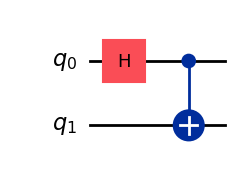

In [8]:
qc.draw(output='mpl')

In [11]:
from qiskit.quantum_info import Pauli

In [23]:
ZZ = Pauli('ZZ')
ZI = Pauli('ZI')
IZ = Pauli('IZ')
XX = Pauli('XX')
XI = Pauli('XI')
IX = Pauli('IX')

observables = [ZZ,ZI,IZ,XX,XI,IX]


In [25]:
#execute on the backend
from qiskit_aer.primitives import Estimator

estimator = Estimator()

job = estimator.run([qc] * len(observables), observables)

job.result()

EstimatorResult(values=array([ 1.        , -0.0234375 , -0.0234375 ,  1.        ,  0.01953125,
        0.01953125]), metadata=[{'shots': 1024, 'variance': 0.0, 'simulator_metadata': [{'batched_shots_optimization': False, 'required_memory_mb': 0, 'method': 'stabilizer', 'active_input_qubits': [0, 1], 'device': 'CPU', 'remapped_qubits': False, 'num_qubits': 2, 'num_clbits': 2, 'time_taken': 0.0026924, 'sample_measure_time': 0.0013415, 'input_qubit_map': [[0, 0], [1, 1]], 'max_memory_mb': 8155, 'measure_sampling': True, 'noise': 'ideal', 'parallel_shots': 1, 'parallel_state_update': 2, 'runtime_parameter_bind': False, 'num_bind_params': 1, 'fusion': {'enabled': False}}]}, {'shots': 1024, 'variance': 0.99945068359375, 'simulator_metadata': [{'batched_shots_optimization': False, 'required_memory_mb': 0, 'method': 'stabilizer', 'active_input_qubits': [0, 1], 'device': 'CPU', 'remapped_qubits': False, 'num_qubits': 2, 'num_clbits': 2, 'time_taken': 0.0026924, 'sample_measure_time': 0.0013415,

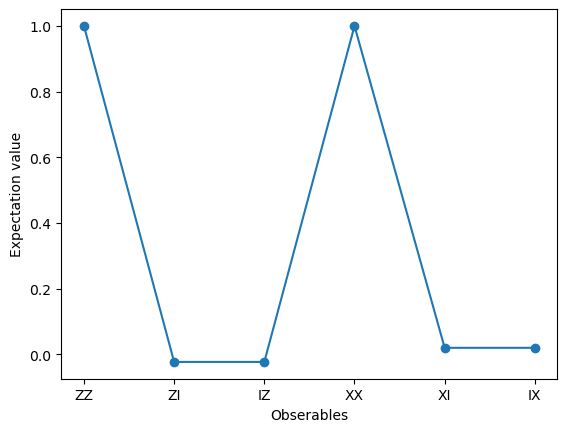

In [27]:
import matplotlib.pyplot as plt

data = ['ZZ', 'ZI', 'IZ', 'XX', 'XI', 'IX']
values = job.result().values

plt.plot(data, values, '-o')
plt.xlabel('Obserables')
plt.ylabel('Expectation value')
plt.show()